In [1]:
import pandas as pd
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WineData.csv')
df.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<h2>Task 1: Data Preprocessing</h2>

Handle any missing values if present.<br>
Scale the data using StandardScaler or MinMaxScaler since K-means is sensitive to the scale of features<br>.
Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
mmscaler = MinMaxScaler()
#Standardize features by removing the mean and scaling to unit variance.
#z = (x - u) / s

In [6]:
scaler.fit(df)

StandardScaler()

In [7]:
df_scaler=scaler.transform(df)

In [8]:
df_scaler

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

<h2>Task 2: Determine the Optimal Number of Clusters</h2>

Use the Elbow method to determine the optimal number of clusters.<br>
Visualize the results using a line plot of the Within-Cluster Sum of Squares (WCSS) against the number of clusters.

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss = []
cluster = range(1,15)

for k in cluster:
    km = KMeans(n_clusters = k)
    km.fit(df_scaler)
    wcss.append(km.inertia_)

In [11]:
wcss

[2314.0000000000005,
 1659.7609889391244,
 1279.9661527749454,
 1236.9970973940667,
 1116.9763807877157,
 1080.5782776597841,
 1012.541004568875,
 965.58727353263,
 946.7730610374549,
 909.3392094095007,
 871.8793245534871,
 821.6110527600428,
 784.271339020489,
 747.8120660624645]

In [12]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'WCSS')

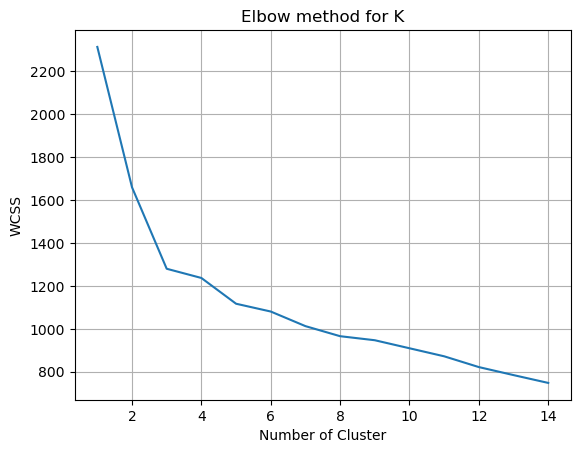

In [13]:
plt.plot(range(1,15),wcss)
plt.grid()
plt.title('Elbow method for K')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')

In [14]:
from kneed import KneeLocator as kn

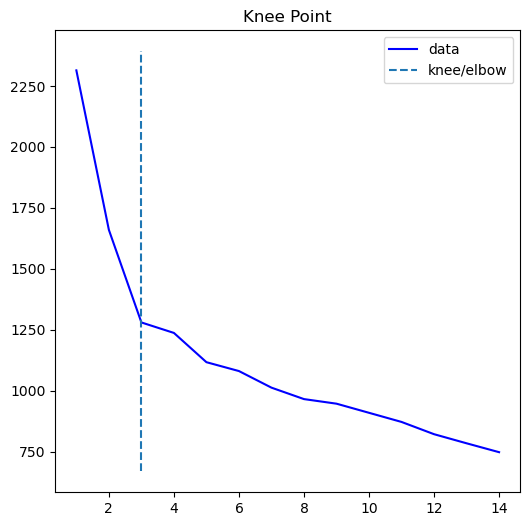

In [15]:
k = kn(cluster,wcss,direction='decreasing',curve='convex')
k.plot_knee()

In [16]:
k.knee

3

<h2>Task 3: K-means Clustering</h2>

<ul>
    <li>Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.</li>
    <li>Assign cluster labels to each data point and create a new column in the dataset with these labels.</li>
</ul>

In [17]:
km = KMeans(n_clusters = 3)

In [18]:
predict=km.fit_predict(df_scaler)

In [28]:
df['Cluster'] = predict
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [20]:
cen = km.cluster_centers_

In [21]:
cen

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [22]:
df0 = df[df['Cluster']==0]
df1 = df[df['Cluster']==1]
df2 = df[df['Cluster']==2]

In [23]:
df0.shape

(51, 14)

In [24]:
df1.shape

(65, 14)

In [25]:
df.shape

(178, 14)

In [26]:
df2.shape

(62, 14)

In [29]:
from sklearn.decomposition import PCA
import seaborn as sns

In [35]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaler)
df_pca = pd.DataFrame(data=df_pca,columns=['PCA1','PCA2'])
df_pca

,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [39]:
df_pca['Cluster'] = df['Cluster']
df_pca.head()

,PCA1,PCA2,Cluster
0,3.316751,-1.443463,2
1,2.209465,0.333393,2
2,2.516740,-1.031151,2
3,3.757066,-2.756372,2
4,1.008908,-0.869831,2


In [45]:
df0 = df_pca[df_pca.Cluster==0]
df1 = df_pca[df_pca.Cluster==1]
df2 = df_pca[df_pca.Cluster==2]

In [46]:
df0.shape

(51, 3)

In [47]:
df1.shape

(65, 3)

In [48]:
df2.shape

(62, 3)

In [49]:
df_pca.shape

(178, 3)

In [ ]:
from matplotlib import pyplot as plt

In [65]:
cen = km.cluster_centers_

In [66]:
cen

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

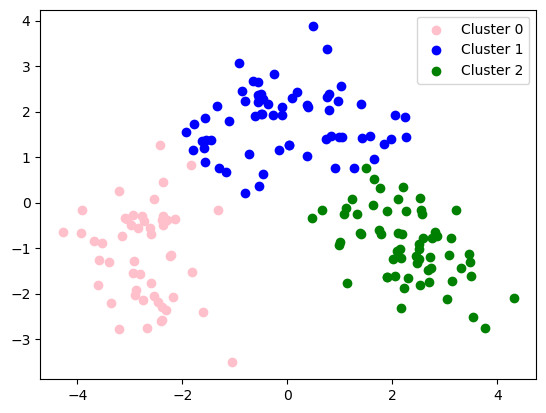

In [68]:
plt.scatter(df0.PCA1, df0.PCA2, color='pink',label = 'Cluster 0')
plt.scatter(df1.PCA1, df1.PCA2, color = 'blue', label = 'Cluster 1')
plt.scatter(df2.PCA1,df2.PCA2 , color = 'green', label = 'Cluster 2')

plt.legend()

<h2>Task 4: Cluster Analysis</h2>